# 照相机静止不动时的calibration parameters

## 介绍

3个file：from0，from10，from23三个csv文件，记录的是从三个marker获得的camera_to_base的transformation，

格式为(x,y,z,alpha,beta,gamma)

In [1]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

import sys
import numpy as np
import scipy as sp
import IPython
import pandas as pd
import csv
import cv2

import numpy.random as rd
from numpy.linalg import inv


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from scipy import stats


#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
pylab.rcParams['figure.figsize'] = 12,8

## ground truth of calibration parameter 

In [3]:
xt = -0.100
yt = 0.87529999
zt = 0.62499994
at = 1.57079633
bt = 0.00
ct = 0.00

## 读入三个csv文件

In [4]:
data_from0 = pd.read_csv("from0.txt",delimiter = " ")
data_from10 = pd.read_csv("from10.txt",delimiter = " ")
data_from23 = pd.read_csv("from23.txt",delimiter = " ")

### 去零

In [5]:
drop_10=data_from10.index[data_from10['x'] == 0].tolist()
c= drop_10
df10=data_from10.drop(data_from10.index[c])


In [6]:
drop_0=data_from0.index[data_from0['x'] == 0].tolist()
c= drop_0
df0=data_from0.drop(data_from0.index[c])


In [7]:
drop_23=data_from23.index[data_from23['x'] == 0].tolist()
c= drop_23
df23=data_from23.drop(data_from23.index[c])


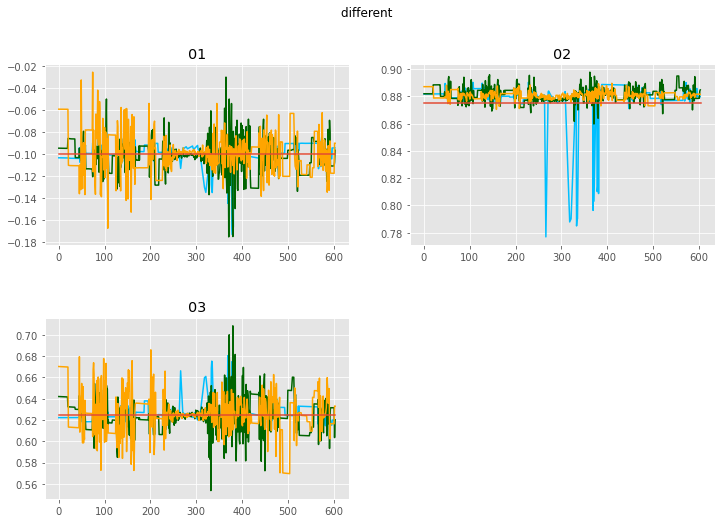

In [8]:
x10 = df10['x']
y10 = df10['y']
z10 = df10['z']

x23 = df23['x']
y23 = df23['y']
z23 = df23['z']

x0 = df0['x']
y0 = df0['y']
z0 = df0['z']

fig = plt.figure()
fig.suptitle('different ')
fig.subplots_adjust(hspace=0.4)

ax221 = fig.add_subplot(221)  
ax221.set_title('01')
ax221.plot(x0, color='deepskyblue')
ax221.plot(x10, color='darkgreen')
ax221.plot(x23, color='orange')
x_coordinates = [0,len(data_from0['x'])]
y_coordinates = [xt, xt]
ax221.plot(x_coordinates, y_coordinates)

ax222 = fig.add_subplot(222)
ax222.set_title('02')
ax222.plot(y0, color='deepskyblue')
ax222.plot(y10, color='darkgreen')
ax222.plot(y23, color='orange')
x_coordinates = [0,len(data_from0['x'])]
y_coordinates = [yt, yt]
ax222.plot(x_coordinates, y_coordinates)

ax223 = fig.add_subplot(223)
ax223.set_title('03')
ax223.plot(z0, color='deepskyblue')
ax223.plot(z10, color='darkgreen')
ax223.plot(z23, color='orange')
ax223.plot(zt,color='red')
x_coordinates = [0,len(data_from0['x'])]
y_coordinates = [zt, zt]
ax223.plot(x_coordinates, y_coordinates)

## 卡尔曼滤波器

当没有传感器输入时怎么办？

If at a time t the measurement is missing, only the time-update is computed and the measurement update must be skipped. 


https://math.stackexchange.com/questions/982982/kalman-filter-with-missing-measurement-inputs

In [9]:
# 6: x, y, z, dx, dy, dz; 3: observe conditions
kalman_pos10 = cv2.KalmanFilter(6, 3) 
#print(type())
# measurement matrix
kalman_pos10.measurementMatrix= np.array([[1, 0, 0, 0, 0, 0], 
                                        [0, 1, 0, 0, 0, 0], 
                                        [0, 0, 1, 0, 0, 0]], np.float32)

# transition matrix
kalman_pos10.transitionMatrix = np.array([[1, 0, 0, 1, 0, 0], 
                                    [0, 1, 0, 0, 1, 0], 
                                    [0, 0, 1, 0, 0, 1], 
                                    [0, 0, 0, 1, 0, 0], 
                                    [0, 0, 0, 0, 1, 0],
                                    [0, 0, 0, 0, 0, 1],], np.float32)


# Process Noise noise covariance
kalman_pos10.processNoiseCov = np.array([ [1, 0, 0, 0, 0, 0], 
                                    [0, 1, 0, 0, 0, 0],
                                    [0, 0, 1, 0, 0, 0],
                                    [0, 0, 0, 1, 0, 0],
                                    [0, 0, 0, 0, 1, 0],
                                    [0, 0, 0, 0, 0, 1]], np.float32)*1e-5

# Measurement Noise Covariance
kalman_pos10.measurementNoiseCov = np.array([[1, 0, 0], 
                                        [0, 1, 0], 
                                        [0, 0, 1]], np.float32)*0.4


In [10]:
# 6: x, y, z, dx, dy, dz; 3: observe conditions
kalman_pos0 = cv2.KalmanFilter(6, 3) 
#print(type())
# measurement matrix
kalman_pos0.measurementMatrix= np.array([[1, 0, 0, 0, 0, 0], 
                                        [0, 1, 0, 0, 0, 0], 
                                        [0, 0, 1, 0, 0, 0]], np.float32)

# transition matrix
kalman_pos0.transitionMatrix = np.array([[1, 0, 0, 1, 0, 0], 
                                    [0, 1, 0, 0, 1, 0], 
                                    [0, 0, 1, 0, 0, 1], 
                                    [0, 0, 0, 1, 0, 0], 
                                    [0, 0, 0, 0, 1, 0],
                                    [0, 0, 0, 0, 0, 1],], np.float32)


# Process Noise noise covariance
kalman_pos0.processNoiseCov = np.array([ [1, 0, 0, 0, 0, 0], 
                                    [0, 1, 0, 0, 0, 0],
                                    [0, 0, 1, 0, 0, 0],
                                    [0, 0, 0, 1, 0, 0],
                                    [0, 0, 0, 0, 1, 0],
                                    [0, 0, 0, 0, 0, 1]], np.float32)*1e-5

# Measurement Noise Covariance
kalman_pos0.measurementNoiseCov = np.array([[1, 0, 0], 
                                        [0, 1, 0], 
                                        [0, 0, 1]], np.float32)*0.4


In [11]:
# 6: x, y, z, dx, dy, dz; 3: observe conditions
kalman_pos23 = cv2.KalmanFilter(6, 3) 
#print(type())
# measurement matrix
kalman_pos23.measurementMatrix= np.array([[1, 0, 0, 0, 0, 0], 
                                        [0, 1, 0, 0, 0, 0], 
                                        [0, 0, 1, 0, 0, 0]], np.float32)

# transition matrix
kalman_pos23.transitionMatrix = np.array([[1, 0, 0, 1, 0, 0], 
                                    [0, 1, 0, 0, 1, 0], 
                                    [0, 0, 1, 0, 0, 1], 
                                    [0, 0, 0, 1, 0, 0], 
                                    [0, 0, 0, 0, 1, 0],
                                    [0, 0, 0, 0, 0, 1],], np.float32)


# Process Noise noise covariance
kalman_pos23.processNoiseCov = np.array([ [1, 0, 0, 0, 0, 0], 
                                    [0, 1, 0, 0, 0, 0],
                                    [0, 0, 1, 0, 0, 0],
                                    [0, 0, 0, 1, 0, 0],
                                    [0, 0, 0, 0, 1, 0],
                                    [0, 0, 0, 0, 0, 1]], np.float32)*1e-5

# Measurement Noise Covariance
kalman_pos23.measurementNoiseCov = np.array([[1, 0, 0], 
                                        [0, 1, 0], 
                                        [0, 0, 1]], np.float32)*0.4


In [12]:
# initalize measurement and predictions
last_measurement_pos0 = current_measurement_pos0 = (data_from0['x'][0],data_from0['y'][0],data_from0['z'][0])
last_prediction_pos0 = current_prediction_pos0 = ([data_from0['x'][0]],[data_from0['y'][0]],[data_from0['z'][0]],
                                                    [0],[0],[0])

last_measurement_pos10 = current_measurement_pos10 = (data_from10['x'][0],data_from10['y'][0],data_from10['z'][0])
last_prediction_pos10 = current_prediction_pos10 = ([data_from10['x'][0]],[data_from10['y'][0]],[data_from10['z'][0]],
                                                    [0],[0],[0])

last_measurement_pos23 = current_measurement_pos23 = (data_from23['x'][0],data_from23['y'][0],data_from23['z'][0])
last_prediction_pos23 = current_prediction_pos23 = ([data_from23['x'][0]],[data_from23['y'][0]],[data_from23['z'][0]],
                                                    [0],[0],[0])

initial_state = 1

In [13]:
filtered_pos_array10 = np.zeros((len(data_from10['x']),3))
filtered_pos_array23 = np.zeros((len(data_from10['x']),3))
filtered_pos_array0 = np.zeros((len(data_from10['x']),3))
filtered_pos_array = np.zeros((len(data_from10['x']),3))

In [14]:
def kalman_filter(step):  
    global data_from0, data_from10, data_from23

    global current_measurement_pos23, last_measurement_pos23, current_prediction_pos23, last_prediction_pos23
  #  global current_measurement_ori23, last_measurement_ori23, current_prediction_ori23, last_prediction_ori23
    
    global current_measurement_pos10, last_measurement_pos10, current_prediction_pos10, last_prediction_pos10
  #  global current_measurement_ori10, last_measurement_ori10, current_prediction_ori10, last_prediction_ori10
    
    global current_measurement_pos0, last_measurement_pos0, current_prediction_pos0, last_prediction_pos0
 #   global current_measurement_ori0, last_measurement_ori0, current_prediction_ori0, last_prediction_ori0
    
    global filtered_pos_array0, filtered_pos_array10, filtered_pos_array23
    global  initial_state
    
    
    # save current prediction as last prediction
    last_prediction_pos23 = current_prediction_pos23
    last_prediction_pos10 = current_prediction_pos10
    last_prediction_pos0 = current_prediction_pos0
#    last_prediction_ori23 = current_prediction_ori23 
    
    
    # save current measurement as last measurement
    last_measurement_pos23 = current_measurement_pos23
    last_measurement_pos10 = current_measurement_pos10
    last_measurement_pos0 = current_measurement_pos0
#    last_measurement_ori23 = current_measurement_ori23
    
    # current_measurement
    current_measurement_pos23 = np.array([data_from23['x'][step], data_from23['y'][step], data_from23['z'][step]],dtype = np.float32) 
    current_measurement_pos10 = np.array([data_from10['x'][step], data_from10['y'][step], data_from10['z'][step]],dtype = np.float32) 
    current_measurement_pos0 = np.array([data_from0['x'][step], data_from0['y'][step], data_from0['z'][step]],dtype = np.float32) 

    #  current_measurement_ori = np.array([[np.float32(a)], [np.float32(b)], [np.float32(c)]]) 

    # kalman cycle:
    if(initial_state==0):
        # prediction phase
        current_prediction_pos23 = kalman_pos23.predict()
        current_prediction_pos10 = kalman_pos10.predict()
        current_prediction_pos0 = kalman_pos0.predict()

        # correction phase. If no measurement(marker loss or etc.), no update of posterior value
        if(data_from23['x'][step]!=0 and data_from23['y'][step]!=0 and data_from23['z'][step]!=0):
            result_pos_23 = kalman_pos23.correct(current_measurement_pos23) 
        else:
            result_pos_23 = current_prediction_pos23
            kalman_pos23.errorCovPost = kalman_pos23.errorCovPre
        
        if(data_from10['x'][step]!=0 and data_from10['y'][step]!=0 and data_from10['z'][step]!=0):
            result_pos_10 = kalman_pos10.correct(current_measurement_pos10) 
        else:
            result_pos_10 = current_prediction_pos10
            kalman_pos10.errorCovPost = kalman_pos10.errorCovPre
            
        if(data_from0['x'][step]!=0 and data_from0['y'][step]!=0 and data_from0['z'][step]!=0):
            result_pos_0 = kalman_pos0.correct(current_measurement_pos0) 
        else:
            result_pos_0 = current_prediction_pos0
            kalman_pos0.errorCovPost = kalman_pos0.errorCovPre 
    

    else:
        initial_state = 0
        result_pos_23 = current_prediction_pos23       
        kalman_pos23.statePost = np.asarray(current_prediction_pos23, dtype = np.float32)
        kalman_pos23.errorCovPost = np.eye(6,dtype = np.float32)
        
        result_pos_10 = current_prediction_pos10     
        kalman_pos10.statePost = np.asarray(current_prediction_pos10, dtype = np.float32)
        kalman_pos10.errorCovPost = np.eye(6,dtype = np.float32)
        
        result_pos_0 = current_prediction_pos0     
        kalman_pos0.statePost = np.asarray(current_prediction_pos0, dtype = np.float32)
        kalman_pos0.errorCovPost = np.eye(6,dtype = np.float32)
    
    # fusion cycle:
     
    P1 = kalman_pos0.errorCovPost
    P2 = kalman_pos10.errorCovPost
    P3 = kalman_pos23.errorCovPost
    x1 = kalman_pos0.statePost
    x2 = kalman_pos10.statePost
    x3 = kalman_pos23.statePost
    P = inv(inv(P1)+inv(P2)+inv(P3))
    A1 = np.matmul(P,inv(P1))
    A2 = np.matmul(P,inv(P2))
    A3 = np.matmul(P,inv(P3))
    
    x_filtered = np.matmul(A1,x1)+np.matmul(A2,x2)+np.matmul(A3,x3)
    
    filtered_pos_array23[i][0] = result_pos_23[0][0]
    filtered_pos_array23[i][1] = result_pos_23[1][0]
    filtered_pos_array23[i][2] = result_pos_23[2][0]
    
    filtered_pos_array0[i][0] = result_pos_0[0][0]
    filtered_pos_array0[i][1] = result_pos_0[1][0]
    filtered_pos_array0[i][2] = result_pos_0[2][0]
    
    filtered_pos_array10[i][0] = result_pos_10[0][0]
    filtered_pos_array10[i][1] = result_pos_10[1][0]
    filtered_pos_array10[i][2] = result_pos_10[2][0]
    
    filtered_pos_array[i][0] = x_filtered[0][0]
    filtered_pos_array[i][1] = x_filtered[1][0]
    filtered_pos_array[i][2] = x_filtered[2][0]



In [15]:
for i in range (0,len(data_from10['x'])):
    kalman_filter(i)

In [16]:
print(filtered_pos_array)

[[-0.08587301  0.88360167  0.64480472]
 [-0.08587716  0.88360131  0.64479303]
 [-0.08588186  0.88360101  0.6447801 ]
 ...
 [-0.10545085  0.88108528  0.62423539]
 [-0.10495433  0.88112319  0.6235649 ]
 [-0.10412207  0.88118744  0.62346613]]


In [17]:
xf = filtered_pos_array[:,0]
yf = filtered_pos_array[:,1]
zf = filtered_pos_array[:,2]

### marker 10

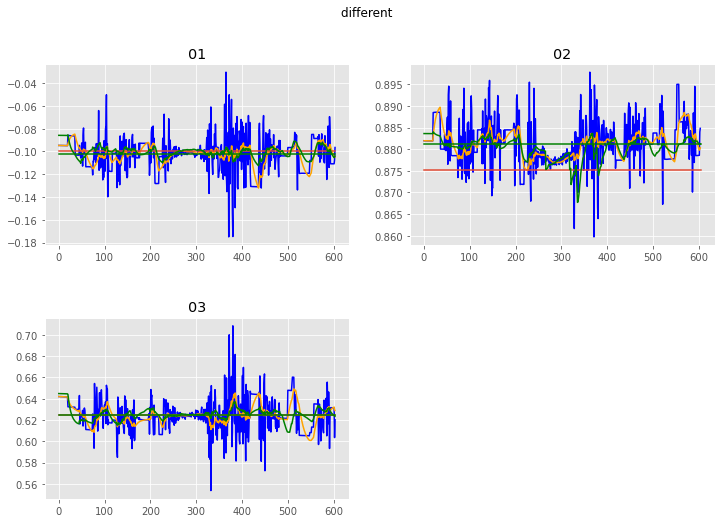

In [18]:
x10 = df10['x']
y10 = df10['y']
z10 = df10['z']
xf10 = filtered_pos_array10[:,0]
yf10 = filtered_pos_array10[:,1]
zf10 = filtered_pos_array10[:,2]

fig = plt.figure()
fig.suptitle('different ')
fig.subplots_adjust(hspace=0.4)

ax221 = fig.add_subplot(221)  
ax221.set_title('01')
ax221.plot(x10, color='blue')
ax221.plot(xf10, color='orange')

mx = df10[['x']].mean(axis=0)
x_coordinates = [0,len(data_from0['x'])]
y_coordinates = [xt, xt]
x_average = [mx,mx]
ax221.plot(x_coordinates, y_coordinates)
ax221.plot(x_coordinates, x_average,color='green')

ax222 = fig.add_subplot(222)
ax222.set_title('02')
ax222.plot(y10, color='blue')
ax222.plot(yf10, color='orange')

x_coordinates = [0,len(data_from0['x'])]
y_coordinates = [yt, yt]
ax222.plot(x_coordinates, y_coordinates)

my = df10[['y']].mean(axis=0)
y_average = [my,my]
ax222.plot(x_coordinates, y_average,color='green')

ax223 = fig.add_subplot(223)
ax223.set_title('03')
ax223.plot(z10, color='blue')
ax223.plot(zf10, color='orange')
ax223.plot(zt,color='red')
x_coordinates = [0,len(data_from0['x'])]
y_coordinates = [zt, zt]
ax223.plot(x_coordinates, y_coordinates)

mz = df10[['z']].mean(axis=0)
z_average = [mz,mz]
ax223.plot(x_coordinates, z_average,color='green')


ax221.plot(xf, color='green')
ax222.plot(yf, color='green')
ax223.plot(zf, color='green')

### marker 23

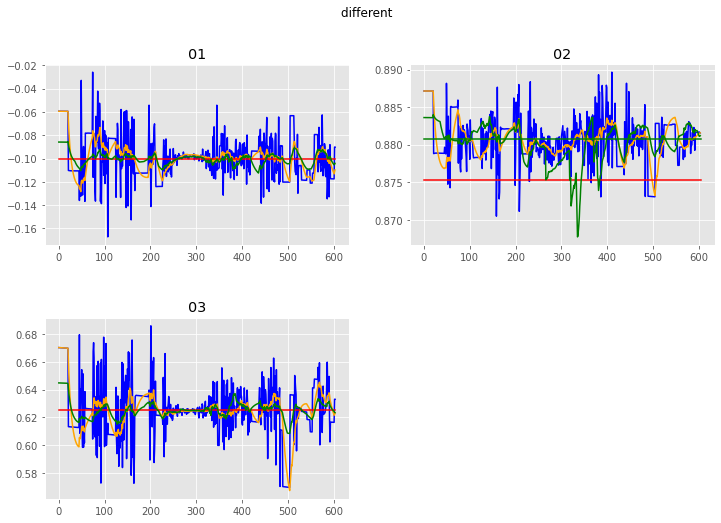

In [19]:
x23 = df23['x']
y23 = df23['y']
z23 = df23['z']
xf23 = filtered_pos_array23[:,0]
yf23 = filtered_pos_array23[:,1]
zf23 = filtered_pos_array23[:,2]

fig = plt.figure()
fig.suptitle('different ')
fig.subplots_adjust(hspace=0.4)

ax221 = fig.add_subplot(221)  
ax221.set_title('01')
ax221.plot(x23, color='blue')
ax221.plot(xf23, color='orange')
x_coordinates = [0,len(data_from0['x'])]
y_coordinates = [xt, xt]
ax221.plot(x_coordinates, y_coordinates,color='red')


ax222 = fig.add_subplot(222)
ax222.set_title('02')
ax222.plot(y23, color='blue')
ax222.plot(yf23, color='orange')
x_coordinates = [0,len(data_from0['x'])]
y_coordinates = [yt, yt]
ax222.plot(x_coordinates, y_coordinates,color='red')
my = df23[['y']].mean(axis=0)
y_average = [my,my]
ax222.plot(x_coordinates, y_average,color='green')

ax223 = fig.add_subplot(223)
ax223.set_title('03')
ax223.plot(z23, color='blue')
ax223.plot(zf23, color='orange')
ax223.plot(zt,color='red')
x_coordinates = [0,len(data_from0['x'])]
y_coordinates = [zt, zt]
ax223.plot(x_coordinates, y_coordinates,color='red')

ax221.plot(xf, color='green')
ax222.plot(yf, color='green')
ax223.plot(zf, color='green')

### marker 0

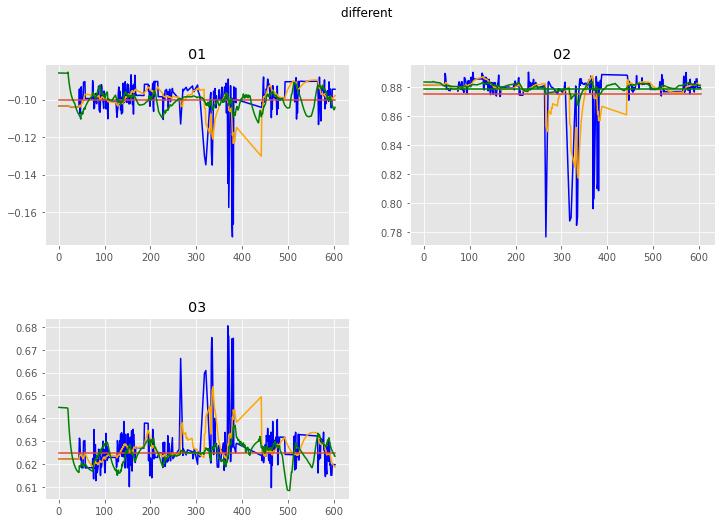

In [20]:
x0 = df0['x']
y0 = df0['y']
z0 = df0['z']
xf0 = filtered_pos_array0[:,0]
yf0 = filtered_pos_array0[:,1]
zf0 = filtered_pos_array0[:,2]

fig = plt.figure()
fig.suptitle('different ')
fig.subplots_adjust(hspace=0.4)

ax221 = fig.add_subplot(221)  
ax221.set_title('01')
ax221.plot(x0, color='blue')
ax221.plot(xf0, color='orange')
x_coordinates = [0,len(data_from0['x'])]
y_coordinates = [xt, xt]
ax221.plot(x_coordinates, y_coordinates)

ax222 = fig.add_subplot(222)
ax222.set_title('02')
ax222.plot(y0, color='blue')
ax222.plot(yf0, color='orange')
x_coordinates = [0,len(data_from0['x'])]
y_coordinates = [yt, yt]
ax222.plot(x_coordinates, y_coordinates)
my = df0[['y']].mean(axis=0)
y_average = [my,my]
ax222.plot(x_coordinates, y_average,color='green')

ax223 = fig.add_subplot(223)
ax223.set_title('03')
ax223.plot(z0, color='blue')
ax223.plot(zf0, color='orange')
ax223.plot(zt,color='red')
x_coordinates = [0,len(data_from0['x'])]
y_coordinates = [zt, zt]
ax223.plot(x_coordinates, y_coordinates)

ax221.plot(xf, color='green')
ax222.plot(yf, color='green')
ax223.plot(zf, color='green')

### plot filter together

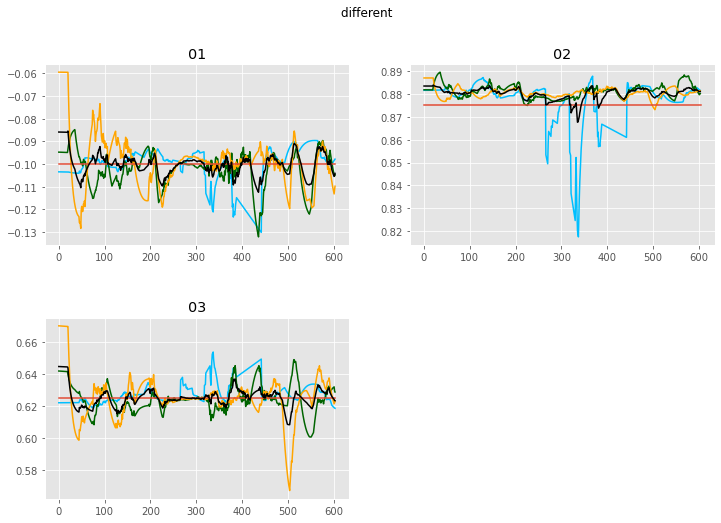

In [21]:


fig = plt.figure()
fig.suptitle('different ')
fig.subplots_adjust(hspace=0.4)

ax221 = fig.add_subplot(221)  
ax221.set_title('01')
ax221.plot(xf0, color='deepskyblue')
ax221.plot(xf10, color='darkgreen')
ax221.plot(xf23, color='orange')
x_coordinates = [0,len(data_from0['x'])]
y_coordinates = [xt, xt]
ax221.plot(x_coordinates, y_coordinates)

ax222 = fig.add_subplot(222)
ax222.set_title('02')
ax222.plot(yf0, color='deepskyblue')
ax222.plot(yf10, color='darkgreen')
ax222.plot(yf23, color='orange')
x_coordinates = [0,len(data_from0['x'])]
y_coordinates = [yt, yt]
ax222.plot(x_coordinates, y_coordinates)

ax223 = fig.add_subplot(223)
ax223.set_title('03')
ax223.plot(zf0, color='deepskyblue')
ax223.plot(zf10, color='darkgreen')
ax223.plot(zf23, color='orange')
ax223.plot(zt,color='red')
x_coordinates = [0,len(data_from0['x'])]
y_coordinates = [zt, zt]
ax223.plot(x_coordinates, y_coordinates)

ax221.plot(xf, color='black')
ax222.plot(yf, color='black')
ax223.plot(zf, color='black')